In [1]:
from __future__ import division
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np, pickle
import math, sys, os, glob, h5py, json
from astropy import units as u
from sklearn.neighbors import KernelDensity

import pint
from pint import toa
from pint import models
from pint.residuals import Residuals
from pint.simulation import make_fake_toas_fromMJDs
pint.logging.setup(sink=sys.stderr, level="WARNING", usecolors=True)

import pta_replicator
from pta_replicator import simulate
from pta_replicator import white_noise

libstempo not installed. PINT or libstempo are required to use par and tim files.
WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/pint/models/model_builder.py:198 UserWarning: Unrecognized parfile line 'NE_SW1 0.0'
WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/pint/observatory/clock_file.py:176 UserWarning: Data points out of range in clock file 'tai2tt_bipm2021.clk'
WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/pint/models/noise_model.py:166 UserWarning: EQUAD maskParameter(EQUAD2 -f Rcvr1_2_GASP 0.05873021316047649 (us)) has no TOAs
WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/pint/models/noise_model.py:166 UserWarning: EQUAD maskParameter(EQUAD3 -f Rcvr1_2_GUPPI 0.03650

WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/pint/models/noise_model.py:173 UserWarning: EFAC maskParameter(EFAC5 -f Rcvr_800_GASP 0.9812018056612056 ()) has no TOAs
WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/pint/models/noise_model.py:173 UserWarning: EFAC maskParameter(EFAC6 -f Rcvr_800_GUPPI 1.0499531287828798 ()) has no TOAs
WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/pint/models/noise_model.py:173 UserWarning: EFAC maskParameter(EFAC7 -f Rcvr_800_VEGAS 1.016525799378851 ()) has no TOAs
WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/pint/models/noise_model.py:392 UserWarning: ECORR maskParameter(ECORR1 -f 3GHz_YUPPI 0.057743414629469164 (us)) has no TOAs
WARNING 

WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/pint/models/noise_model.py:166 UserWarning: EQUAD maskParameter(EQUAD5 -f Rcvr_800_GASP 0.19089911135662407 (us)) has no TOAs
WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/pint/models/noise_model.py:166 UserWarning: EQUAD maskParameter(EQUAD6 -f Rcvr_800_GUPPI 0.03655474653914281 (us)) has no TOAs
WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/pint/models/noise_model.py:166 UserWarning: EQUAD maskParameter(EQUAD7 -f Rcvr_800_VEGAS 0.10429275954165615 (us)) has no TOAs
WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/pint/models/noise_model.py:173 UserWarning: EFAC maskParameter(EFAC1 -f 3GHz_YUPPI 1.0197055808778044 ()) has no TOA

WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/pint/models/noise_model.py:392 UserWarning: ECORR maskParameter(ECORR3 -f Rcvr1_2_GUPPI 0.0692429444226352 (us)) has no TOAs
WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/pint/models/noise_model.py:392 UserWarning: ECORR maskParameter(ECORR4 -f Rcvr1_2_VEGAS 0.0508858562729086 (us)) has no TOAs
WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/pint/models/noise_model.py:392 UserWarning: ECORR maskParameter(ECORR6 -f Rcvr_800_GUPPI 0.05157251455640264 (us)) has no TOAs
WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/pint/models/noise_model.py:392 UserWarning: ECORR maskParameter(ECORR7 -f Rcvr_800_VEGAS 0.025052357660408198 (us)) has

WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/pint/models/noise_model.py:173 UserWarning: EFAC maskParameter(EFAC3 -f Rcvr1_2_GUPPI 1.035855368149409 ()) has no TOAs
WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/pint/models/noise_model.py:173 UserWarning: EFAC maskParameter(EFAC4 -f Rcvr1_2_VEGAS 1.0354180154105217 ()) has no TOAs
WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/pint/models/noise_model.py:173 UserWarning: EFAC maskParameter(EFAC5 -f Rcvr_800_GASP 0.9812018056612056 ()) has no TOAs
WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/pint/models/noise_model.py:173 UserWarning: EFAC maskParameter(EFAC6 -f Rcvr_800_GUPPI 1.0499531287828798 ()) has no TOAs
WARNING  (pi

WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/numpy/lib/function_base.py:2455 RuntimeWarning: invalid value encountered in do_format (vectorized)
WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/numpy/lib/function_base.py:2455 RuntimeWarning: invalid value encountered in do_format (vectorized)
WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/numpy/lib/function_base.py:2455 RuntimeWarning: invalid value encountered in do_format (vectorized)
WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator/lib/python3.10/site-packages/numpy/lib/function_base.py:2455 RuntimeWarning: invalid value encountered in do_format (vectorized)
WARNING  (pint.logging                  ): /Users/vigeland/opt/anaconda3/envs/dev-pta_replicator

In [5]:
datadir = '/Users/vigeland/Documents/Research/NANOGrav/nanograv_data/NG20/Data/ng20_v1p1_dmx/'

myparfile = datadir + 'parfiles/J1909-3744_PINT_20250319.nb.par'
mytimfile = datadir + 'timfiles/J1909-3744_PINT_20250411.nb.tim'

psr = simulate.load_pulsar(myparfile, mytimfile, ephem='DE440')

In [6]:
# remove red noise from the model (we will add it back later)
if 'PLRedNoise' in psr.model.components.keys():
    psr.model.remove_component('PLRedNoise')
    
psr.generate_daily_avg_toas(ideal=True)

Pulsar J1909-3744 has 47558 TOAs observed with 7 systems...
Filtering out 6988 TOAs with flag 3GHz_YUPPI observed with vla...
Filtering out 809 TOAs with flag Rcvr1_2_GASP observed with gbt...
Filtering out 20554 TOAs with flag Rcvr1_2_GUPPI observed with gbt...
Filtering out 5730 TOAs with flag Rcvr1_2_VEGAS observed with gbt...
Filtering out 869 TOAs with flag Rcvr_800_GASP observed with gbt...
Filtering out 9520 TOAs with flag Rcvr_800_GUPPI observed with gbt...
Filtering out 3088 TOAs with flag Rcvr_800_VEGAS observed with gbt...
Pulsar J1909-3744 now has 758 daily averaged TOAs


In [7]:
def get_current_flags(flags):
    
    current_backends = ['CHIME', 'YUPPI', 'VEGAS']
    current_flags = []
    
    for f in flags:
        if np.any([c in f for c in current_backends]):
            current_flags.append(f)
    
    return current_flags

def get_cadence(toas, flag, dt=365):
    
    obs = toas[toas['f'] == f].get_mjds().to(u.d).value
    
    last_obs = max(obs)
    nobs = len(np.where(obs >= max(obs) - 365)[0])
    
    return nobs

In [8]:
def get_errors(psr, flag, numobs):

    log10_errs = np.log10(psr.toas[psr.toas['f'] == flag].get_errors().to(u.s).value)
    
    # fit KDE to distribution of the log10_errs
    # only fit to the distribution up to the 95% upper limit to avoid drawing extremely large errors
    log10_err_distr = log10_errs[log10_errs < np.percentile(log10_errs, 95)]
    mykde = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(log10_err_distr.reshape((log10_err_distr.size, 1)))
    errs = 10**mykde.sample(numobs).reshape(numobs)
    
    return errs

def make_new_toas(psr, flag, cadence, end_mjd):
    
    if 'VEGAS' in flag:
        obs = 'gbt'
    elif 'CHIME' in flag:
        obs = 'chime'
    elif 'YUPPI' in flag:
        obs = 'vla'
    
    last_obs = max(psr.toas[psr.toas['f'] == flag].get_mjds().to(u.d).value)
    
    Tspan = end_mjd - last_obs
    nobs = int(Tspan/365.24*cadence)
    delta_t = 365.24/cadence

    start_mjd = last_obs + delta_t

    mjds = np.arange(start_mjd, end_mjd, delta_t)

    errs = get_errors(psr, flag, nobs)

    return toa.get_TOAs_array(mjds, obs=obs, flags={'f': flag}, model=None, 
                              errors=errs*1e6, planets=True, ephem='DE440')

In [9]:
end_mjd = 61587

flags = list(np.unique(psr.toas['f']))
current_flags = get_current_flags(flags)

if len(current_flags) < 1:
    print('This pulsar is not currently being observed!')

else:
    for f in current_flags:

        print('Making new observations with {0}...'.format(f))
        cadence = get_cadence(psr.toas, f)
        
        if cadence == 0:
            print('This pulsar is not currently being observed with {0}.'.format(f))
            
        else:
            new_toas = make_new_toas(psr, f, cadence, end_mjd)

            # make sure the new TOAs are compatible with the old ones
            if psr.toas.obliquity is not None:
                new_toas.obliquity = psr.toas.obliquity
                new_toas.update_all_times()
    
            if 'fe' in psr.toas.table.keys():
                new_toas.table.add_column([None for _ in range(len(new_toas))], name='fe')
        
            if 'f' in psr.toas.table.keys():
                new_toas.table.add_column([f for _ in range(len(new_toas))], name='f')
    
            psr.toas.merge(new_toas)

Making new observations with 3GHz_YUPPI...
Making new observations with Rcvr1_2_VEGAS...
Making new observations with Rcvr_800_VEGAS...


In [10]:
simulate.make_ideal(psr)

white_noise.add_measurement_noise(psr, efac=1)

for _ in range(3):
    psr.fit()
    
# at this point, you could also inject in red noise and a GWB

In [11]:
def make_residual_plot(psr, save=False, simdir='pint_sims1/'):

    # switch to rainbow colormap grouped by telescopes
    colors = {
                "CHIME": "#FFA733",
                "327_ASP": "#BE0119",
                "327_PUPPI": "#BE0119",
                "430_ASP": "#FD9927",
                "430_PUPPI": "#FD9927",
                "L-wide_ASP": "#BDB6F6",
                "L-wide_PUPPI": "#BDB6F6",
                "Rcvr1_2_GASP": "#79A3E2",
                "Rcvr1_2_GUPPI": "#79A3E2",
                "Rcvr1_2_VEGAS": "#79A3E2",
                "Rcvr_800_GASP": "#8DD883",
                "Rcvr_800_GUPPI": "#8DD883",
                "Rcvr_800_VEGAS": "#8DD883",
                "S-wide_ASP": "#C4457A",
                "S-wide_PUPPI": "#C4457A",
                "1.5GHz_YUPPI": "#EBADCB",
                "3GHz_YUPPI": "#E79CC1",
                "6GHz_YUPPI": "#DB6BA1",
            }

    fig, axs = plt.subplots(1, 1)

    flags = list(np.unique(psr.toas['f']))

    for f in flags:

        idx = (psr.toas['f'] == f)
    
        axs.errorbar(psr.toas[idx].get_mjds(), psr.residuals.calc_time_resids()[idx], 
                     yerr=psr.toas[idx].get_errors(), marker='.', ls='', alpha=0.5, 
                     label=f, color=colors[f])

    plt.title('{0} -- {1} TOAs'.format(psr.name, len(psr.toas)))
    plt.xlabel('MJD')
    plt.ylabel('Residual [s]')
    plt.legend()
    plt.tight_layout();

    if save:
        plt.savefig(simdir + '/{0}.png'.format(psr.name))

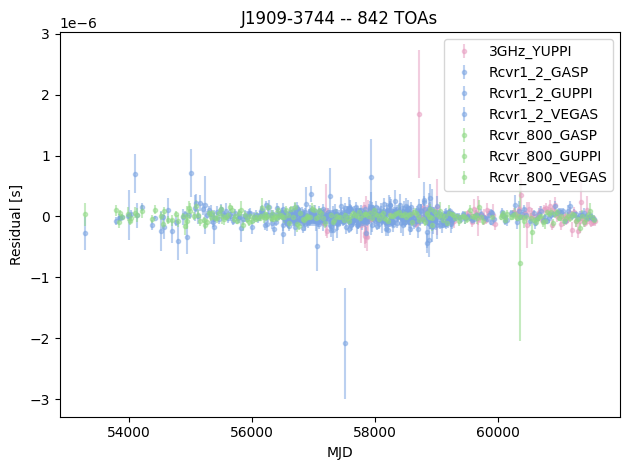

In [12]:
make_residual_plot(psr, save=False)